In [1]:
working_dir = '/mnt/c/users/fordd/Downloads/RW_PGM_FE/'
py_files_dir =  working_dir+'py_files/'
saved_arrays_dir = working_dir+'saved_arrays/'
saved_models_dir = working_dir+'saved_models/'
pdb_files_dir = working_dir+'pdb_files/'
trajectory_files_dir = working_dir+'trajectory_files/'

In [2]:
import os

os.chdir(py_files_dir)

from utils import *
from model import *
from IC_MAP import *

os.chdir(working_dir)

In [3]:
T = 300 # K
PDB = pdb_files_dir+'alanine-dipeptide-in-vacuum.pdb'
inds_CVs = [[4, 6, 8, 14], [6, 8, 14, 16]]
FF_name = "amber99sbildn.xml"

In [4]:
get_labels_ = get_labels_from_CVs_alanine_dipeptide_

In [6]:
smiv = Single_Molecule_In_Vaccum(PDB,
                                 FF=FF_name,
                                 default_temperature=T)

using app.ForceField
# cpu cores will be used for evaluation: 16


In [7]:
path_dataset = trajectory_files_dir+'AD'+str(T)+'b'

# WTmetaD biased dataset.

smiv.load_simulation_data_(path_dataset)

loading ['AD_300K_500.0ns_FES(kT)', 'AD_300K_500.0ns_s', 'AD_300K_500.0ns_Tu', 'AD_300K_500.0ns_Tv', 'AD_300K_500.0ns_u', 'AD_300K_500.0ns_v', 'AD_300K_500.0ns_xyz']


In [8]:
u_ = Local_PE(
global_potential_energy_function_ = smiv.u_,
clustering_function_ = lambda xyz : get_labels_(get_torsional_CVs_(xyz,inds_CVs)),       
) 
u = smiv.u
xyz = smiv.xyz ; print(xyz.shape)

if None in smiv.s: CVs = get_torsional_CVs_(xyz,inds_CVs)
else:              CVs = smiv.s
if None in smiv.v: metaD_weights = np.ones([len(u),1])
else:              metaD_weights = np.exp(smiv.v)

(500000, 22, 3)


In [12]:
# biased data : nonuniform weights
(metaD_weights-1).sum()

88186377767109.84

In [13]:
labels = get_labels_(CVs)
n_states = len(set(labels))
inds_states = [np.where(labels==k)[0] for k in range(n_states)]
counts_states = [len(x) for x in inds_states]
print('number of metastable states:',n_states)

number of metastable states: 4


In [16]:
'''oh = c_to_oh_(labels)
df,dfu,dfl = block_average_(oh,
                   block_size = 20000,
                   weights = metaD_weights / metaD_weights.sum(),
                   FE = True,
                  )
plt.plot(df)
plt.plot(dfu)
plt.plot(dfl)'''

'oh = c_to_oh_(labels)\ndf,dfu,dfl = block_average_(oh,\n                   block_size = 20000,\n                   weights = metaD_weights / metaD_weights.sum(),\n                   FE = True,\n                  )\nplt.plot(df)\nplt.plot(dfu)\nplt.plot(dfl)'

In [18]:
# running FE estimates from reweighted counts:
delta_f_states = deltaf_states_in_time_(labels, weights=metaD_weights, align=True)

FE estimates of state 2 (often the lowest FE) moved to around 0


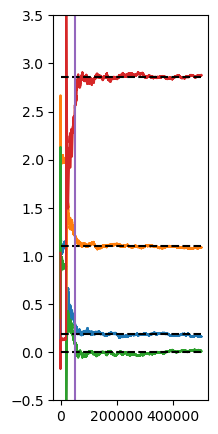

In [19]:
eps = 0.5
fig = plt.figure(figsize=(2,5))

plt.plot(delta_f_states + 0.04)
##
_from  = 50000
delta_f_ground_truth = delta_f_states[_from:].mean(0)
delta_f_ground_truth -= delta_f_ground_truth.min()
[plt.plot([0,len(u)],[x]*2,'--',color='black') for x in delta_f_ground_truth]

plt.plot([_from]*2,[-0.5,3.5])

plt.ylim(-0.5,3.5)
plt.show()

In [20]:
# seen in the same way in notebook 'AD_and_IB_WTmetaD_FE_plots'
delta_f_ground_truth
# 0.19308704, 1.10727756, 0.        , 2.86034197 

array([0.19308704, 1.10727756, 0.        , 2.86034197])

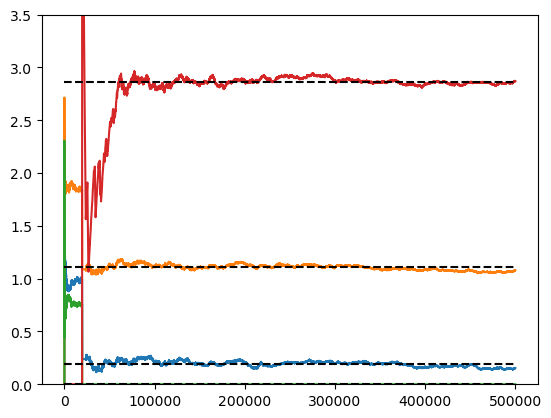

In [22]:
delta_f_states_aligned = delta_f_states-delta_f_states.min(-1,keepdims=True)
plt.plot(delta_f_states_aligned)
plt.ylim(0,3.5)
[plt.plot([0,len(u)],[x]*2,'--',color='black') for x in delta_f_ground_truth]
plt.show()

In [15]:
#inds_states_centres10 = [inds[np.argsort(u[inds,0])[:10]].tolist() for inds in inds_states]
#[plt.scatter(CVs[inds,0],CVs[inds,1])for inds in inds_states_centres10]
#plt.ylim(-PI,PI)
#plt.xlim(-PI,PI)
#plt.show()
#save_pickle_(np.array([xyz[inds] for inds in inds_states_centres10]),'AD300u_init_ki_xyz')

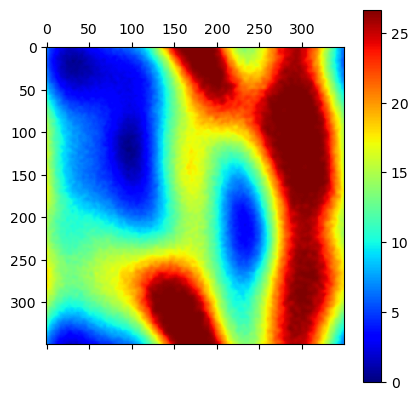

In [24]:
if smiv.FES is None:
    plt.matshow(-np.log(np.flip(np.histogramdd(CVs,bins=60,range=[[-PI,PI]]*2,density=True)[0].T,axis=0)),cmap='jet')
else:
    plt.matshow(np.flip(smiv.FES,axis=0),cmap='jet')
plt.colorbar()

In [25]:
ic_map = XR_MAP_mixed_only(PDB)
xyz = ic_map.align_data_(xyz,
                         eps_singularity = [1e-6,1e-6],
                         )
xyz.shape

full IC would be possible
next run align_data_(R_data)
inds_keep_cartesian: [6 4 8]
These indices work. All atoms can be reached.
# variables static:    6
# variables isotropic: 0
# variables flowing:   60
# total variables 66


(500000, 22, 3)

cartesian atoms (from which 6 dof are removed) via alignment: [4 6 8]
n_hydrogens 12


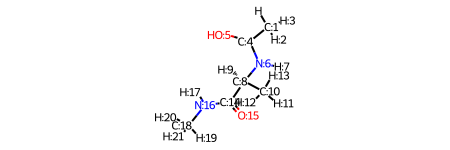

In [26]:
print('cartesian atoms (from which 6 dof are removed) via alignment:',ic_map.inds_XYZ)
print('n_hydrogens',ic_map.n_hydrogens)
ic_map.mol

True


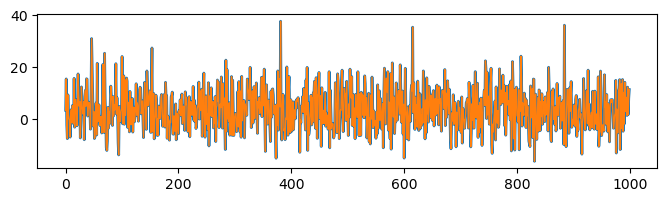

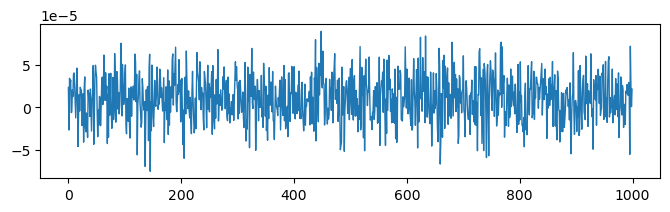

Process Worker-8:
Process Worker-15:
Process Worker-13:
Process Worker-4:
Process Worker-12:
Process Worker-14:
Process Worker-6:
Process Worker-5:
Process Worker-16:
Process Worker-7:
Process Worker-2:
Process Worker-11:
Process Worker-9:
Process Worker-10:
Process Worker-1:
Process Worker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/fordd/miniconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/mnt/c/users/fordd/Downloads/RW_PGM_FE/py_files/multicontext_openmm.py", line 205, in run
    for task in iter(self._task_queue.get, None):
  File "/home/fordd/miniconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/fordd/miniconda3/lib/python3.8/multip

  File "/home/fordd/miniconda3/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/fordd/miniconda3/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/fordd/miniconda3/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/fordd/miniconda3/lib/python3.8/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
KeyboardInterrupt
  File "/home/fordd/miniconda3/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/home/fordd/miniconda3/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/fordd/miniconda3/lib/python3.8/multiprocessing/connection.py", li

In [27]:
# check that alligned data has the same potential enregies as saved during simulation.
N_total = xyz.shape[0]
rand_inds = np.random.choice(N_total,1000,replace=False)
fig = plt.figure(figsize=(8,2))
plt.plot(u_(xyz[rand_inds]), linewidth=2)
plt.plot(u[rand_inds], linewidth=1)
print(np.allclose(u_(xyz[rand_inds]), u[rand_inds], atol=1e-4))
plt.show()
fig = plt.figure(figsize=(8,2))
plt.plot(u[rand_inds] - u_(xyz[rand_inds]), linewidth=1)
plt.show()

In [28]:
print('counts_states:',counts_states)
training_set_size = min(counts_states)//2
print('size of the training and validation sets:', training_set_size)

counts_states: [101985, 90532, 194752, 112731]
size of the training and validation sets: 45266


0 : 0.03381193010376952 < 0.045


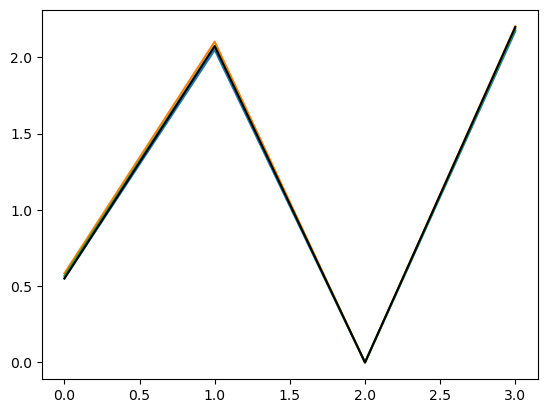

In [30]:
av_u_GT0 = np.array([pool_(u[inds_states[k]],metaD_weights[inds_states[k]]).mean() for k in range(n_states)])
av_u_GT0 -= av_u_GT0.min()

done = False
err_max = 0.045
for i in range(1000):
    if not done:
        _inds_rand = None
        _inds_rand = load_pickle_(saved_arrays_dir+'_inds_rand_AD300b') # 851 
        training, validation, _inds_rand = split_into_training_data_(xyz,u,metaD_weights,
                                            labels=labels,
                                            training_set_size=training_set_size,
                                            inds_rand = _inds_rand)
        xyz_training, u_training, w_training = training
        xyz_validation, u_validation, w_validation = validation
        del training, validation 

        w_training = [x/x.sum() for x in w_training]
        w_validation = [x/x.sum() for x in w_validation]

        ##
        av_u_T = np.array([pool_(u_training[k],w_training[k]) for k in range(n_states)])
        av_u_T -= av_u_T.min()
        av_u_V = np.array([pool_(u_validation[k],w_validation[k]) for k in range(n_states)])
        av_u_V -= av_u_V.min()
        av_u_GT = (av_u_V+av_u_T)*0.5
        av_u_GT -= av_u_GT.min()
        
        ##
        err = (np.linalg.norm(av_u_GT0-av_u_GT) + np.linalg.norm(av_u_GT0-av_u_T) + np.linalg.norm(av_u_GT0-av_u_V) )/3
        clear_output(wait=True)
        if err <= err_max:
            done = True
            print(i,':',err ,'<',err_max)
        else: 
            done = False
            print(i,':',err)

plt.plot(av_u_T)
plt.plot(av_u_V)
plt.plot(av_u_GT)
plt.plot(av_u_GT0 - av_u_GT0.min(),color='black')

In [64]:
#save_pickle_(_inds_rand, '_inds_rand_AD300b')

In [31]:
print([x.shape for x in xyz_training])
print([x.shape for x in xyz_validation])

print([x.shape for x in u_training])
print([x.shape for x in u_validation])

print([x.shape for x in w_training])
print([x.shape for x in w_validation])

[(45266, 22, 3), (45266, 22, 3), (45266, 22, 3), (45266, 22, 3)]
[(45266, 22, 3), (45266, 22, 3), (45266, 22, 3), (45266, 22, 3)]
[(45266, 1), (45266, 1), (45266, 1), (45266, 1)]
[(45266, 1), (45266, 1), (45266, 1), (45266, 1)]
[(45266, 1), (45266, 1), (45266, 1), (45266, 1)]
[(45266, 1), (45266, 1), (45266, 1), (45266, 1)]


In [32]:
inds_rand = np.random.choice(training_set_size,100,replace=False)

for _x,_u in zip(xyz_training, u_training):
    print(np.allclose(u_(_x[inds_rand]),_u[inds_rand], atol=1e-4))
    
k=0
for _x,_u in zip(xyz_training, u_training):
    print(np.allclose(u_(_x[inds_rand],k=k),_u[inds_rand], atol=1e-4))
    k+=1

True
True
True
True
True
True
True
True


In [33]:
def plot_check_(xyz_tv, w_tv = None):
    n_states = len(xyz_tv)
    if w_tv is None: w_tv = [None]*n_states
    else: w_tv = [x.flatten() for x in w_tv]
    for k in range(n_states):
        hist = np.histogramdd(get_torsional_CVs_(xyz_tv[k],inds_CVs),
                              bins=60,
                              range = [[-PI,PI]]*2,
                              weights=w_tv[k],
                              density=True,
                             )[0]
        hist /= hist.sum()
        hist = np.where(hist==0.0,np.nan,hist)
        plt.contour(hist.T, cmap='jet', levels=50)#, colors='C'+str(k), levels=5)
    plt.colorbar()

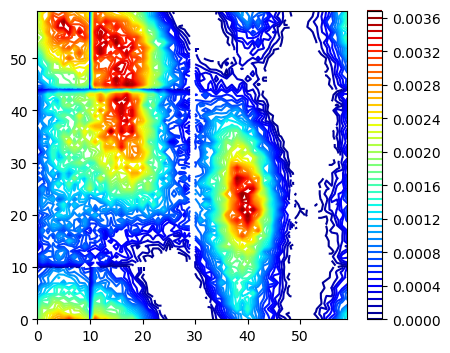

In [34]:
fig = plt.figure(figsize=(5,4))
plot_check_(xyz_training)
plt.show()

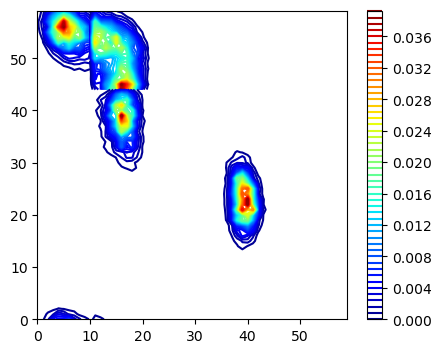

In [35]:
fig = plt.figure(figsize=(5,4))
plot_check_(xyz_training, w_training)
plt.show()

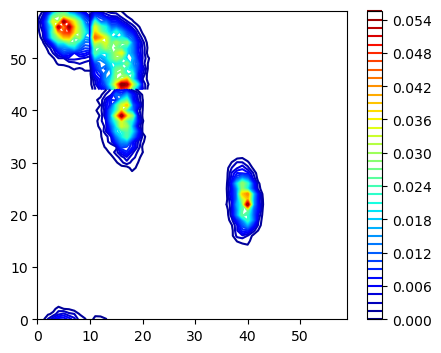

In [36]:
fig = plt.figure(figsize=(5,4))
plot_check_(xyz_validation, w_validation)
plt.show()

In [37]:
PM = ic_map.CSR_obj.periodic_mask
flow_masks = get_list_cond_masks_unsupervised_(len(PM)) ; print(len(flow_masks))
flow_masks = get_random_flow_masks_(len(PM),4) ; print(len(flow_masks))

6
4


In [38]:
PM = ic_map.CSR_obj.periodic_mask
flow_masks = load_pickle_(saved_arrays_dir+'random_flow_masks_AD_(use_in_all_AD)')

In [39]:
learning_rate = 0.001
rate_decay = 0.0 #0.0001

In [40]:
for k in range(n_states):
    globals()['model_'+str(k)] = MODEL_3(periodic_mask = PM,
                                    list_cond_masks = flow_masks,
                                    IC_map = ic_map,
                                    optimiser_LR_decay = [learning_rate, rate_decay],

                                    n_bins_periodic = 8,
                                    number_of_splines_periodic = 2,
                                    n_bins_other = 8,

                                    n_hidden = 1,
                                    hidden_activation = tf.nn.silu,
                                    min_bin_width = 1e-3,
                                    trainable_slopes = True,
                                    min_knot_slope = 1e-3,
                                    dims_hidden = None,
                                    nk_for_periodic_MLP_encoding = 1,
                                    )

There are 7279998 trainable parameters in this model, among 48 trainable_variables.
[NB: To see dimensionalities of the trainable variables print(list(self.shapes_trainable_variables)).] 
There are 7279998 trainable parameters in this model, among 48 trainable_variables.
[NB: To see dimensionalities of the trainable variables print(list(self.shapes_trainable_variables)).] 
There are 7279998 trainable parameters in this model, among 48 trainable_variables.
[NB: To see dimensionalities of the trainable variables print(list(self.shapes_trainable_variables)).] 
There are 7279998 trainable parameters in this model, among 48 trainable_variables.
[NB: To see dimensionalities of the trainable variables print(list(self.shapes_trainable_variables)).] 


In [41]:
trainer = TRAINER(models = [globals()['model_'+str(k)] for k in range(n_states)],
        max_training_batches = 50000,
        n_batches_between_evaluations = 50,
       )

FE estimates of state 2 (often the lowest FE) moved to around 0
FE estimates of state 2 (often the lowest FE) moved to around 0
FE estimates of state 2 (often the lowest FE) moved to around 0
FE estimates of state 2 (often the lowest FE) moved to around 0


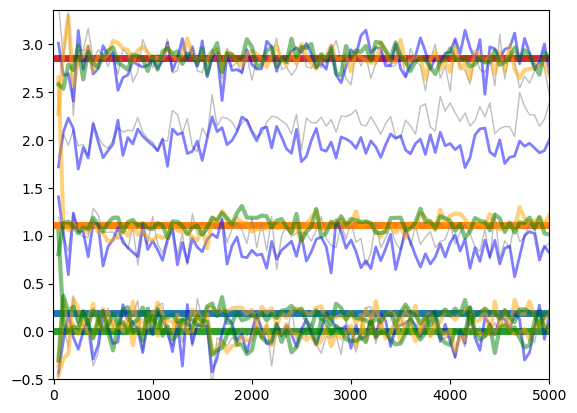

KeyboardInterrupt: 

In [75]:
trainer.train(
            n_batches = 5000,
    
            training_batch_size = 1000,
            evalation_batch_size = 10000,
    
            xyz_training = xyz_training,
            u_training = u_training,
            xyz_validation = xyz_validation,
            u_validation = u_validation,
    
            w_training = w_training,
            w_validation = w_validation,
        
    
            potential_energy_function = u_,
            
            delta_f_ground_truth = delta_f_ground_truth,
            
            evaluate_main = True,
            f_window_grain_BAR_local = [-50,50,2000],
            shuffle = True,
    
            # name_save_BAR_inputs = 'AD300b_BAR_inputs_I', not saving 
            # name_save_mBAR_inputs = 'AD300b_MBAR_inputs_I', both.
            # pymbar was not used in AD300b.
)

In [76]:
#trainer.save_the_above_(saved_arrays_dir+'AD300b_est_grid_AVall')

saved AD300b_est_grid_AVall


In [77]:
#for k in range(n_states):
#    globals()['model_' + str(k)].save_model(saved_models_dir+'model_'+str(k)+'_AD300b')

saved model_0_AD300b
saved model_1_AD300b
saved model_2_AD300b
saved model_3_AD300b


In [ ]:
## results plotted in a different notebook 'AD300b_mBAR'

In [ ]:
evalation_batch_size = 45266 # 10000

rs = []
negS_BGs = []
for k in range(n_states):
    r_samples, negS_BG = trainer.models[k].sample_model(evalation_batch_size)
    rs.append(r_samples)
    negS_BGs.append(negS_BG)
    
ss = [get_torsional_CVs_(r,inds_CVs=inds_CVs) for r in rs]

In [115]:
import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

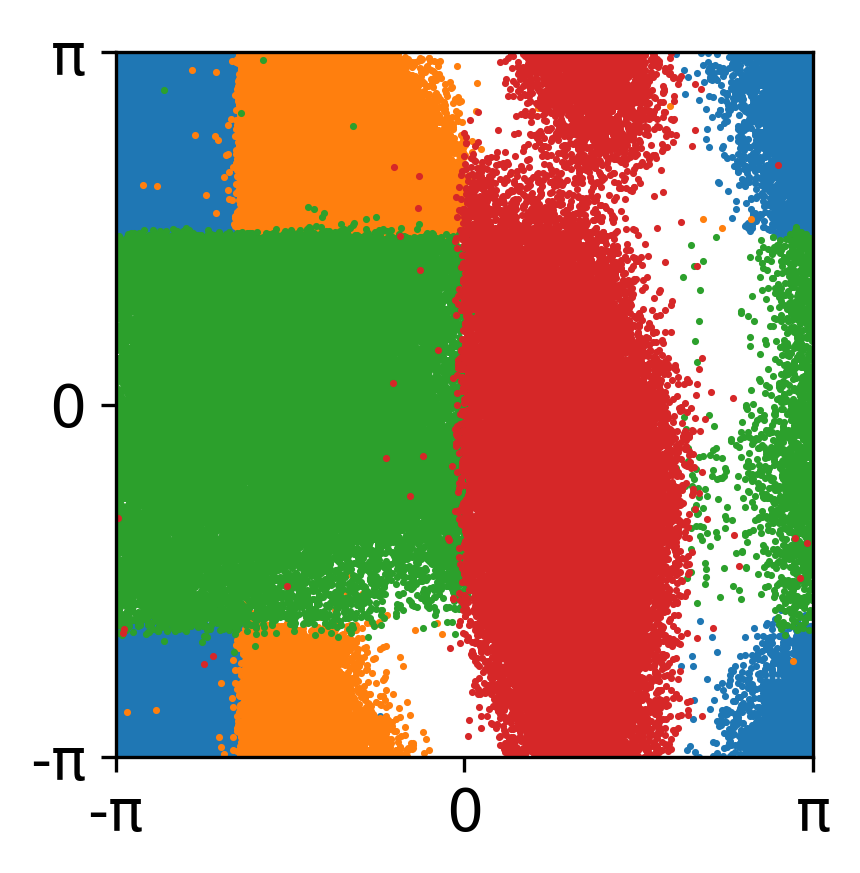

In [116]:
fig = plt.figure(figsize=(3,3.05),dpi=300)
for k in range(n_states):
    plt.scatter(ss[k][:,0],ss[k][:,1],s=0.5)
    
plt.xlim(-PI,PI)
plt.ylim(-PI,PI)
plt.xticks([-PI,0,PI],['-π','0','π'])
plt.yticks([-PI,0,PI],['-π','0','π'])
plt.show() # 45266

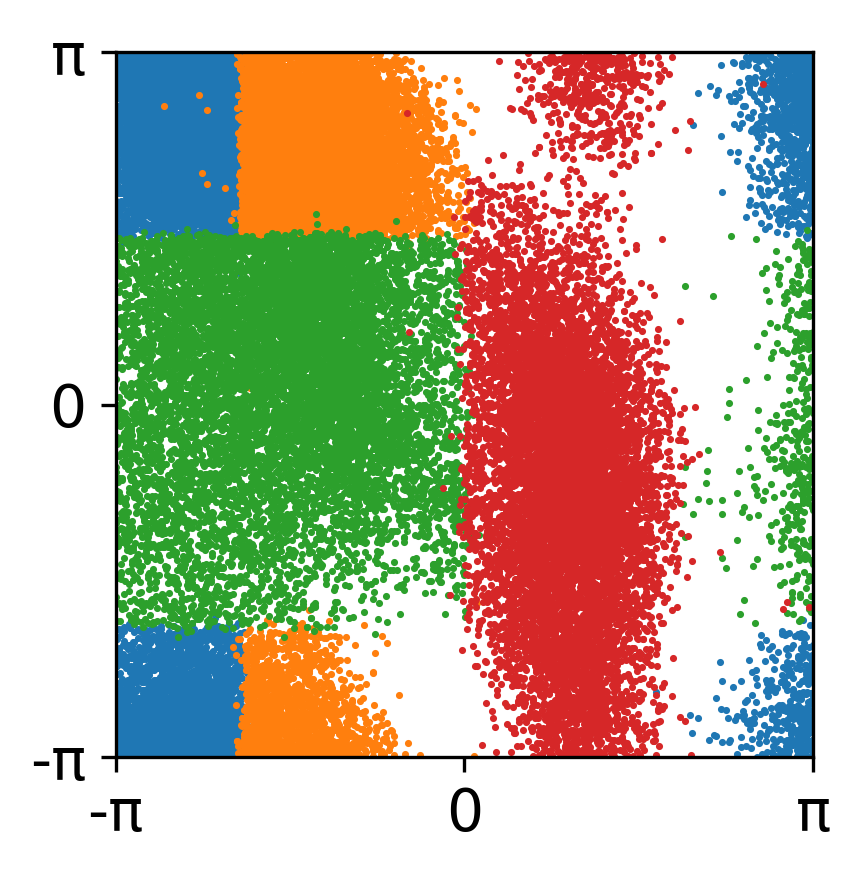

In [93]:
fig = plt.figure(figsize=(3,3.05),dpi=300)
for k in range(n_states):
    plt.scatter(ss[k][:,0],ss[k][:,1],s=0.5)
    
plt.xlim(-PI,PI)
plt.ylim(-PI,PI)
plt.xticks([-PI,0,PI],['-π','0','π'])
plt.yticks([-PI,0,PI],['-π','0','π'])
plt.show() # 10k

In [117]:
xs = [R_to_X_(r,inds_ABCD=ic_map.ABCD)[0].numpy() for r in rs]
xs_true = [R_to_X_(r[:evalation_batch_size],inds_ABCD=ic_map.ABCD)[0].numpy() for r in xyz_training]
ws_true = [w[:evalation_batch_size] for w in w_training]

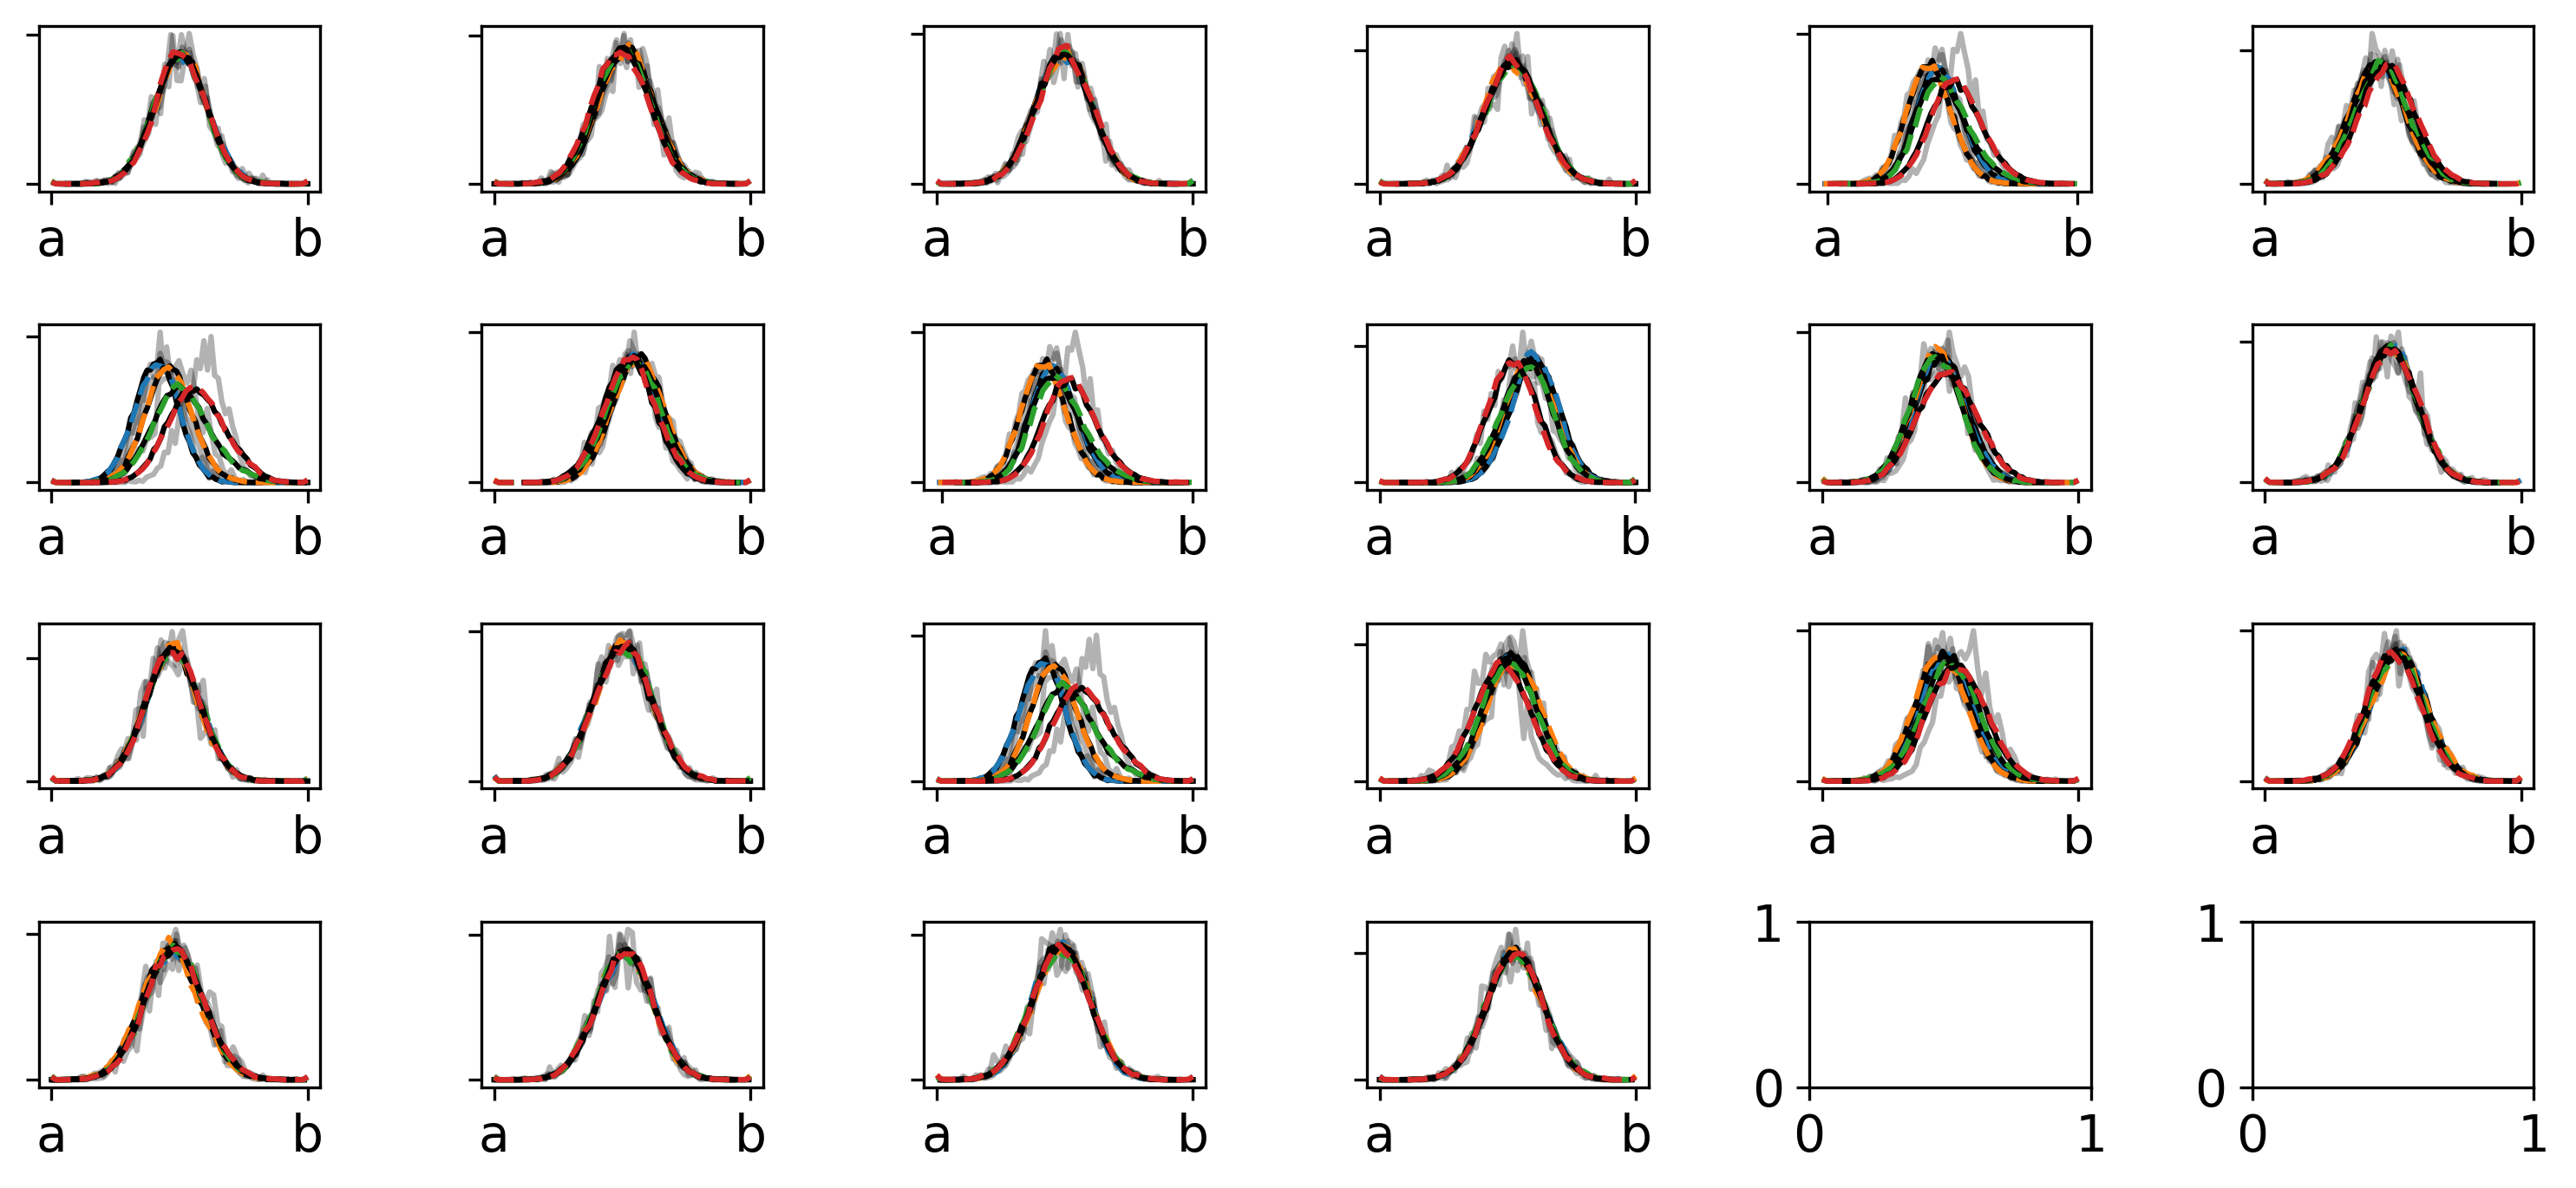

In [141]:
n_rows = 4
fig, axs = plt.subplots(n_rows,6,figsize=(10,7*n_rows/6),dpi=300)

which = 1

a = 0
for i in range(6):
    for j in range(6):
        if a < 22:
            for k in range(n_states):
                
                hist, ax = np.histogram(xs_true[k][:,a,which], weights=ws_true[k][:,0], density=True, bins=60)
                ax = ax[1:] - (ax[1]-ax[0])*0.5
                axs[i,j].plot(ax,hist, color='black',alpha=0.3,zorder=-10)
                
                
                hist0, ax = np.histogram(xs_true[k][:,a,which], density=True, bins=60)
                ax = ax[1:] - (ax[1]-ax[0])*0.5
                axs[i,j].plot(ax,hist0, color='black')

                hist1, ax = np.histogram(xs[k][:,a,which], density=True, bins=60)
                ax = ax[1:] - (ax[1]-ax[0])*0.5
                axs[i,j].plot(ax,hist1,'--',color='C'+str(k), linewidth=1.5)
                if which == 2:
                    axs[i,j].set_xticks([-PI,0,PI],['-π','0','π'])
                else: 
                    axs[i,j].set_xticks([ax.min(),ax.max()],['a','b'])
                
                axs[i,j].set_yticks([0,hist.max()],[])
                #axs[i,j].set_ylim(0,max(hist1.max(),hist0.max())+0.1)
            
        else: pass
        a+=1 

fig.tight_layout()

plt.show()

In [45]:
estimates, evaluation_grid = load_pickle_(saved_arrays_dir+'AD300b_est_grid_AVall')[:2]

FE estimates of state 2 (often the lowest FE) moved to around 0


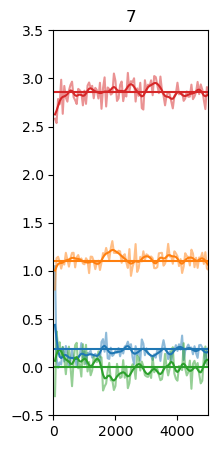

FE estimates of state 2 (often the lowest FE) moved to around 0


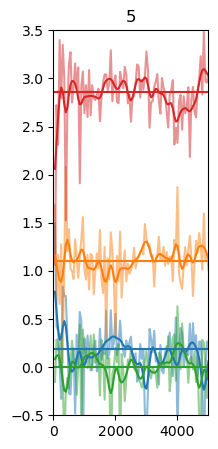

In [46]:
for which in [7,5]:
    start = -100

    x = fs_to_deltafs_(estimates[:,:,which].T, ind_min=None, start=start) # (m,n_states)
    #x-= 0.45
    fig = plt.figure(figsize=(2,5))
    plt.plot(evaluation_grid, x, alpha=0.5)
    [plt.plot(evaluation_grid, simple_smoother_(x[:,k],c=0.6), color='C'+str(k)) for k in range(n_states)]
    [plt.plot([-1,evaluation_grid[-1]],[delta_f_ground_truth[k]]*2, color = 'C'+str(k)) for k in range(n_states)]

    plt.title(which)
    plt.ylim(-0.5,3.5)
    plt.xlim(0,evaluation_grid[-1])
    plt.show()